# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
sinasc = pd.read_csv('SINASC_RO_2019.csv')
sinasc.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [10]:
sinasc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 70 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   ORIGEM          27028 non-null  int64   
 1   CODESTAB        26913 non-null  float64 
 2   CODMUNNASC      27028 non-null  int64   
 3   LOCNASC         27028 non-null  int64   
 4   IDADEMAE        27028 non-null  int64   
 5   ESTCIVMAE       26711 non-null  float64 
 6   ESCMAE          26716 non-null  object  
 7   CODOCUPMAE      24121 non-null  float64 
 8   QTDFILVIVO      25455 non-null  float64 
 9   QTDFILMORT      24930 non-null  float64 
 10  CODMUNRES       27028 non-null  int64   
 11  GESTACAO        25796 non-null  object  
 12  GRAVIDEZ        26949 non-null  object  
 13  PARTO           26979 non-null  object  
 14  CONSULTAS       27028 non-null  int64   
 15  DTNASC          27028 non-null  object  
 16  HORANASC        27007 non-null  float64 
 17  SEXO        

In [6]:
bins = [-float('inf'), -10.5, float('inf')]
labels = ['Abaixo de -10.5', 'Acima de -10.5']

sinasc['faixa_latitude'] = pd.cut(
    sinasc['munResLat'],
    bins=bins,
    labels=labels
)

faixas_latitudes = sinasc.groupby(
    'faixa_latitude', observed=True)[['APGAR1', 'APGAR5']].agg(
    ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
)

faixas_latitudes

APGAR1                                                  \
                      sum      mean  min   max median       std       var   
faixa_latitude                                                              
Abaixo de -10.5  104590.0  8.070216  0.0  10.0    8.0  0.960767  0.923073   
Acima de -10.5   114559.0  8.199771  0.0  10.0    8.0  1.002839  1.005686   

                   APGAR5                                                  
                      sum      mean  min   max median       std       var  
faixa_latitude                                                             
Abaixo de -10.5  118393.0  9.138788  0.0  10.0    9.0  0.805381  0.648638  
Acima de -10.5   128746.0  9.216551  0.0  10.0    9.0  0.774741  0.600224

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [12]:
bins2 = [-float('inf'), 3000, float('inf')]
labels2 = ['Abaixo de 3000', 'Acima de 3000']

sinasc['faixa_area'] = pd.cut(
    sinasc['munResArea'],
    bins=bins2,
    labels=labels2
)

faixas_areas = sinasc.groupby(
    'faixa_area', observed=True)[['CONSULTAS', 'PARIDADE']].agg(
    ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
)

faixas_areas

CONSULTAS                                               \
                     sum      mean min max median       std       var   
faixa_area                                                              
Abaixo de 3000     19520  3.740180   1   9    4.0  0.607492  0.369046   
Acima de 3000      77142  3.537326   1   9    4.0  0.820967  0.673986   

               PARIDADE                                               
                    sum      mean min max median       std       var  
faixa_area                                                            
Abaixo de 3000     3362  0.644185   0   1    1.0  0.478805  0.229255  
Acima de 3000     14172  0.649853   0   1    1.0  0.477027  0.227554

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [13]:
sinasc['munResAlt']

0        338.0
1        338.0
2        338.0
3        397.0
4        338.0
         ...  
27023    595.0
27024    340.0
27025    595.0
27026    595.0
27027    230.0
Name: munResAlt, Length: 27028, dtype: float64

In [15]:
bins3 = [-float('inf'), 350, float('inf')]
labels3 = ['Abaixo de 350', 'Acima de 350']

sinasc['faixa_altitude'] = pd.cut(
    sinasc['munResAlt'],
    bins=bins3,
    labels=labels3
)

faixas_altitudes = sinasc.groupby(
    'faixa_altitude', observed=True)[['QTDPARTNOR', 'QTDPARTCES']].agg(
    ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
)

faixas_altitudes

QTDPARTNOR                                                  \
                      sum      mean  min   max median       std       var   
faixa_altitude                                                              
Abaixo de 350     13911.0  0.599664  0.0  41.0    0.0  1.232142  1.518174   
Acima de 350        660.0  0.338462  0.0   9.0    0.0  0.855554  0.731973   

               QTDPARTCES                                                  
                      sum      mean  min   max median       std       var  
faixa_altitude                                                             
Abaixo de 350     11996.0  0.515159  0.0  12.0    0.0  0.745703  0.556073  
Acima de 350       1140.0  0.584615  0.0   4.0    0.0  0.751103  0.564155

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia


In [5]:
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}

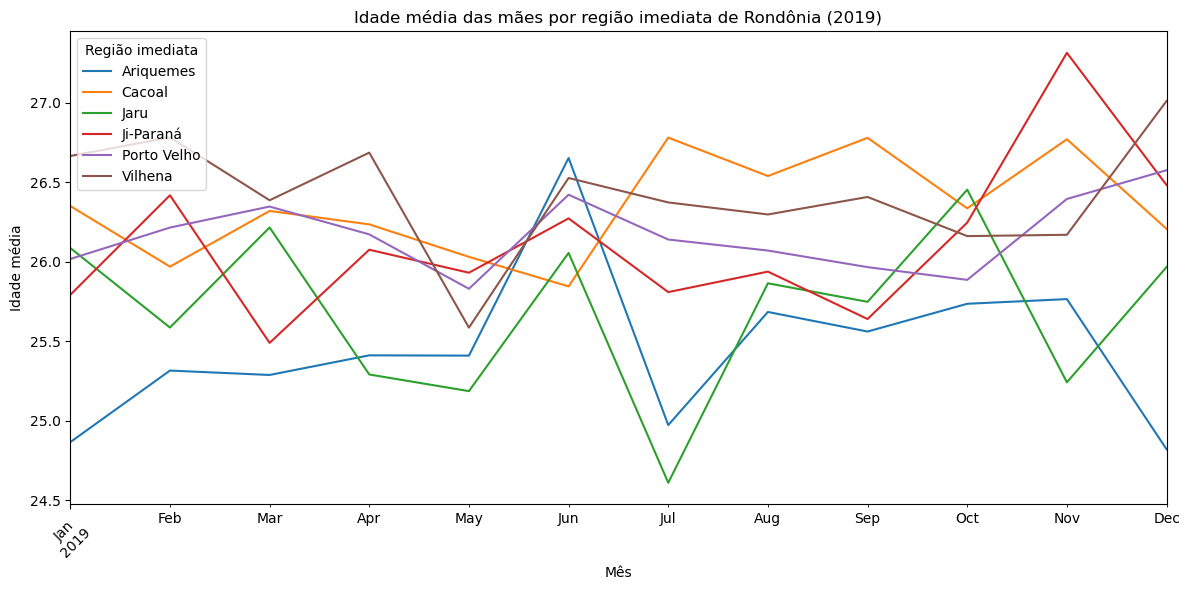

In [16]:
sinasc['DTNASC'] = pd.to_datetime(sinasc['DTNASC'], errors='coerce')

sinasc['mes'] = sinasc['DTNASC'].dt.to_period('M')

sinasc['regiao_imediata'] = sinasc['munResNome'].map(imediatas)

media_idade = sinasc.groupby(['mes', 'regiao_imediata'])['IDADEMAE'].mean().reset_index()

media_pivot = media_idade.pivot(index='mes', columns='regiao_imediata', values='IDADEMAE')

media_pivot.plot(figsize=(12,6))
plt.title('Idade média das mães por região imediata de Rondônia (2019)')
plt.ylabel('Idade média')
plt.xlabel('Mês')
plt.legend(title='Região imediata')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M
### 5.2 IFDM
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM
### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB

In [25]:
indicadores = pd.read_csv('IDH, IFDM e PIB de RO.csv', 
                          encoding='latin-1', 
                          sep=';')
indicadores.head()

,municipio,regiao,idh,ifdm,pib
0,Alta Floresta D'Oeste,Cacoal,0.641,0.6337,496000
1,Alto Alegre dos Parecis,Cacoal,0.592,0.5046,213410
2,Alto Paraíso,Ariquemes,0.625,0.5735,358000
3,Alvorada D'Oeste,Ji-Paraná,0.643,0.5919,204098
4,Ariquemes,Ariquemes,0.702,0.7746,2579830


In [29]:
idh_dict = dict(zip(indicadores['municipio'], indicadores['idh']))
ifdm_dict = dict(zip(indicadores['municipio'], indicadores['ifdm']))
pib_dict = dict(zip(indicadores['municipio'], indicadores['pib']))

sinasc['IDH'] = sinasc['munResNome'].map(idh_dict)
sinasc['IFDM'] = sinasc['munResNome'].map(ifdm_dict)
sinasc['PIB'] = sinasc['munResNome'].map(pib_dict)

# IDH
sinasc['faixa_IDH'] = pd.cut(
    sinasc['IDH'],
    bins=[0, 0.599, 0.699, 0.799, 1],
    labels=['Baixo', 'Médio', 'Alto', 'Muito alto']
)

# IFDM
sinasc['faixa_IFDM'] = pd.cut(
    sinasc['IFDM'],
    bins=[0, 0.4, 0.6, 0.8, 1],
    labels=['Baixo', 'Regular', 'Bom', 'Muito bom']
)

# PIB
pib_bins = pd.qcut(sinasc['PIB'], q=3, labels=['Baixo', 'Médio', 'Alto'])
sinasc['faixa_PIB'] = pib_bins

agrup_idh = sinasc.groupby('faixa_IDH', observed=True)[['IDADEMAE', 'PESO']].mean()
agrup_ifdm = sinasc.groupby('faixa_IFDM', observed=True)[['IDADEMAE', 'PESO']].mean()
agrup_pib = sinasc.groupby('faixa_PIB', observed=True)[['IDADEMAE', 'PESO']].mean()

print(agrup_idh)
print(agrup_ifdm)
print(agrup_pib)

            IDADEMAE         PESO
faixa_IDH                        
Baixo      25.326944  3231.456188
Médio      25.884855  3240.847592
Alto       26.280332  3245.623791
             IDADEMAE         PESO
faixa_IFDM                        
Regular     25.535131  3242.203306
Bom         26.223139  3243.420532
            IDADEMAE         PESO
faixa_PIB                        
Baixo      25.765902  3235.510064
Médio      26.222820  3251.203893
Alto       26.312670  3242.820078


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

* Um insight que consegui encontrar foi que a região imadiata de Ariquemes, tem uma media de idade da mãe menor que as demais 